**In this notebook we will build a CNN to classify flower images. We will also see how our model overfits and how overfitting can be addressed using data augmentation. Data augmentation is a process of generating new training samples from current training dataset using transformations such as zoom, rotations, change in contrast etc**

Credits: I used tensorflow offical tutorial: https://www.tensorflow.org/tutorials/images/classification as a reference and made bunch of changes to make it simpler

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

2024-01-31 20:07:43.998895: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-31 20:07:43.999049: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-31 20:07:44.156804: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


**Load flowers dataset**

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

228813984/228813984 [==============================] - 8s 0us/step


In [3]:
data_dir

'./datasets/flower_photos'

In [4]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [5]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/tulips/13923539227_bdab038dc8.jpg'),
 PosixPath('datasets/flower_photos/tulips/13910678178_25e8b1a5e5.jpg'),
 PosixPath('datasets/flower_photos/tulips/14097745904_436c4ba1b4_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/2481015475_b71a12917d.jpg'),
 PosixPath('datasets/flower_photos/tulips/4572955407_87f4805c7b.jpg')]

In [6]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [7]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/272481307_1eb47ba3e0_n.jpg'),
 PosixPath('datasets/flower_photos/roses/14687731322_5613f76353.jpg'),
 PosixPath('datasets/flower_photos/roses/18220342690_f1c20134bd.jpg'),
 PosixPath('datasets/flower_photos/roses/8035908422_87220425d2_n.jpg'),
 PosixPath('datasets/flower_photos/roses/1645761726_2b1be95472.jpg')]

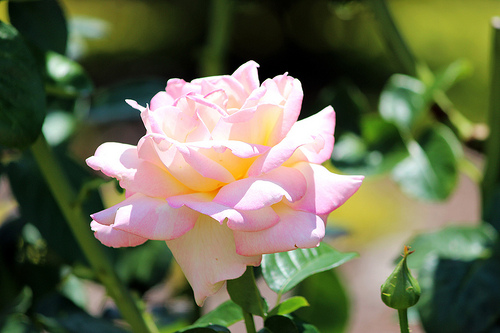

In [8]:
PIL.Image.open(str(roses[1]))

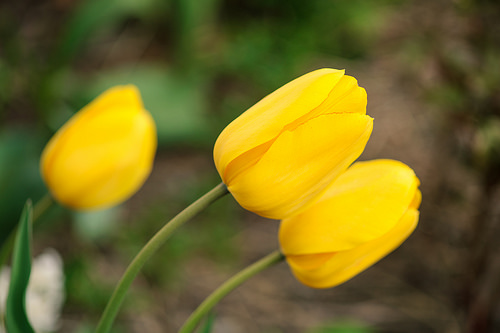

In [9]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

**Read flowers images from disk into numpy array using opencv**

In [10]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [11]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [12]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/272481307_1eb47ba3e0_n.jpg'),
 PosixPath('datasets/flower_photos/roses/14687731322_5613f76353.jpg'),
 PosixPath('datasets/flower_photos/roses/18220342690_f1c20134bd.jpg'),
 PosixPath('datasets/flower_photos/roses/8035908422_87220425d2_n.jpg'),
 PosixPath('datasets/flower_photos/roses/1645761726_2b1be95472.jpg')]

In [13]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/272481307_1eb47ba3e0_n.jpg'

In [14]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))

In [15]:
img.shape

(240, 320, 3)

In [16]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [17]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [18]:
X = np.array(X)
y = np.array(y)

**Train test split**

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

**Preprocessing: scale images**

In [20]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

**Build convolutional neural network and train it**

In [21]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)              

Epoch 1/30
86/86 [==============================] - 45s 506ms/step - loss: 1.3173 - accuracy: 0.4466
Epoch 2/30
86/86 [==============================] - 43s 500ms/step - loss: 0.9996 - accuracy: 0.6094
Epoch 3/30
86/86 [==============================] - 44s 510ms/step - loss: 0.7979 - accuracy: 0.6991
Epoch 4/30
86/86 [==============================] - 43s 505ms/step - loss: 0.6010 - accuracy: 0.7823
Epoch 5/30
86/86 [==============================] - 43s 504ms/step - loss: 0.3781 - accuracy: 0.8663
Epoch 6/30
86/86 [==============================] - 44s 510ms/step - loss: 0.2216 - accuracy: 0.9353
Epoch 7/30
86/86 [==============================] - 43s 503ms/step - loss: 0.1069 - accuracy: 0.9713
Epoch 8/30
86/86 [==============================] - 43s 505ms/step - loss: 0.0477 - accuracy: 0.9887
Epoch 9/30
86/86 [==============================] - 44s 513ms/step - loss: 0.0411 - accuracy: 0.9891
Epoch 10/30
86/86 [==============================] - 44s 508ms/step - loss: 0.0134 - accura

In [22]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 4s 133ms/step - loss: 3.2350 - accuracy: 0.5523


[3.2349679470062256, 0.5522875785827637]

**Here we see that while train accuracy is very high (99%), the test accuracy is significantly low (44.99%) indicating overfitting. Let's make some predictions before we use data augmentation to address overfitting**

In [23]:
predictions = model.predict(X_test_scaled)
predictions

29/29 [==============================] - 4s 142ms/step


array([[ -5.68962   ,   3.0106926 ,  -2.1046016 ,   0.36166015,
         -1.2435359 ],
       [  7.980518  ,  -2.5909057 ,  -8.991922  , -10.007588  ,
         10.93462   ],
       [ -1.1011477 ,  -5.408201  ,  15.55117   , -13.732926  ,
         -5.994001  ],
       ...,
       [ -0.8006981 ,  -8.321482  ,  -2.1899529 ,   7.3626723 ,
         -1.093952  ],
       [  1.5557164 ,  -5.336423  ,  -7.302389  ,  -1.3383191 ,
          7.781491  ],
       [ -5.642448  , -21.207693  ,  -1.4437851 ,  22.408136  ,
         -1.8584663 ]], dtype=float32)

In [24]:
score = tf.nn.softmax(predictions[0])

In [25]:
np.argmax(score)

1

In [26]:
y_test[0]

1

**Improve Test Accuracy Using Data Augmentation**

In [27]:
data_augmentation = keras.Sequential(
  [
    #layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=(img_height,img_width,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

**Original Image**

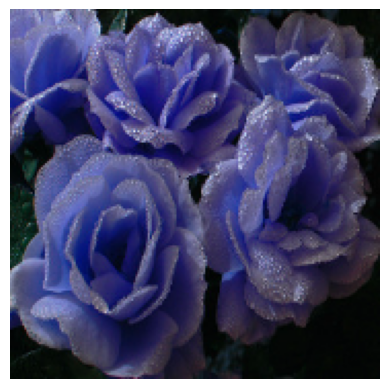

In [28]:
plt.axis('off')
plt.imshow(X[0])

**Newly generated training sample using data augmentation**

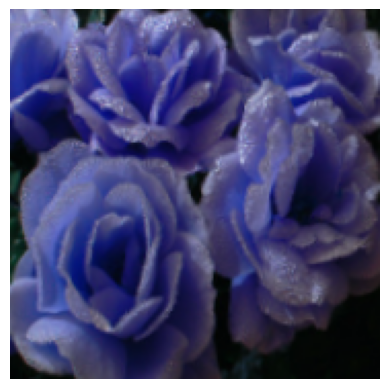

In [29]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

**Train the model using data augmentation and a drop out layer**

In [30]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)   

Epoch 1/30
86/86 [==============================] - 52s 585ms/step - loss: 1.2760 - accuracy: 0.4633
Epoch 2/30
86/86 [==============================] - 50s 582ms/step - loss: 1.0281 - accuracy: 0.5959
Epoch 3/30
86/86 [==============================] - 50s 585ms/step - loss: 0.9245 - accuracy: 0.6486
Epoch 4/30
86/86 [==============================] - 51s 589ms/step - loss: 0.8752 - accuracy: 0.6584
Epoch 5/30
86/86 [==============================] - 50s 584ms/step - loss: 0.7942 - accuracy: 0.6966
Epoch 6/30
86/86 [==============================] - 51s 588ms/step - loss: 0.7449 - accuracy: 0.7177
Epoch 7/30
86/86 [==============================] - 50s 577ms/step - loss: 0.7168 - accuracy: 0.7300
Epoch 8/30
86/86 [==============================] - 50s 586ms/step - loss: 0.6721 - accuracy: 0.7420
Epoch 9/30
86/86 [==============================] - 67s 783ms/step - loss: 0.6251 - accuracy: 0.7678
Epoch 10/30
86/86 [==============================] - 50s 583ms/step - loss: 0.5807 - accura

In [31]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 4s 128ms/step - loss: 1.1403 - accuracy: 0.7288


[1.1402595043182373, 0.7287581562995911]

**You can see that by using data augmentation and drop out layer the accuracy of test set predictions is increased to 73.74%**